# Clean And Analyze Employee Exit Surveys

we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

#### questions

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in       years)

In [668]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
from datetime import datetime

In [669]:
os.getcwd()

'C:\\Users\\hp\\OneDrive\\Desktop\\Data_Analysis\\EmployeeExitSurveys'

In [670]:
dete_data=pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\Data_Analysis\\EmployeeExitSurveys\\DeteEmployeeExit.csv'
                     )
tafe_data=pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\Data_Analysis\\EmployeeExitSurveys\\TafeEmployeeExit.csv',
                     engine='python')
pd.options.display.max_columns = None
print('DETE')
display(dete_data.head())
print("\n")
display(tafe_data.head())

DETE


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,Aug-12,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),Aug-12,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),May-12,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,May-12,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,May-12,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

## Explore dete_data

In [671]:
dete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

## Select useful columns and rename them

In [672]:
cols=['ID','Age','SeparationType', 'Cease Date', 'DETE Start Date', 'Interpersonal conflicts',
      'Job dissatisfaction','Dissatisfaction with the department','Physical work environment',
      'Lack of recognition', 'Lack of job security','Work location', 'Employment conditions',
     'Traumatic incident', 'Work life balance','Workload']
dete_data=dete_data[dete_data.columns[dete_data.columns.isin(cols)]]

cols_mapping={'ID':'id','Age':'age', 'SeparationType':'separation_type', 'Cease Date':'cease_date', 'DETE Start Date':'start_date', 'Interpersonal conflicts':'conflicts',
      'Job dissatisfaction':'job_dissatisfaction','Dissatisfaction with the department':'department_dissatisfaction','Physical work environment':'physical_environment',
      'Lack of recognition':'no_recognition', 'Lack of job security':'no_job_security','Work location':'work_location', 'Employment conditions':'employment_conditions',
     'Traumatic incident':'traumatic_incident',
    'Work life balance':'work_life_balance','Workload':'work_load'}

dete_data=dete_data.rename(columns=cols_mapping)
dete_data=dete_data.dropna()
dete_data= dete_data[dete_data.cease_date != 'Not Stated']
dete_data= dete_data[dete_data.start_date != 'Not Stated']
dete_data.head()

,id,separation_type,cease_date,start_date,conflicts,job_dissatisfaction,department_dissatisfaction,physical_environment,no_recognition,no_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,work_load,age
0,1,Ill Health Retirement,Aug-12,1984,False,True,False,False,True,False,False,False,False,False,False,56-60
2,3,Voluntary Early Retirement (VER),May-12,2011,False,False,False,False,False,False,False,False,False,False,False,61 or older
3,4,Resignation-Other reasons,May-12,2005,False,False,False,False,False,False,False,False,False,False,False,36-40
4,5,Age Retirement,May-12,1970,False,False,False,False,False,False,False,False,False,True,False,61 or older
5,6,Resignation-Other reasons,May-12,1994,False,False,False,False,False,False,False,True,False,False,False,41-45


## explore and clean the date columns; cease_date and start_date

In [673]:
dete_data['cease_date'].value_counts()

2012      303
2013      182
Jan-14     43
Dec-13     34
Sep-13     31
Jun-13     26
Jul-13     21
Oct-13     20
Nov-13     14
Aug-13     12
May-13      7
May-12      6
Apr-14      2
Apr-13      2
Feb-14      2
Jul-06      1
2014        1
Jul-14      1
2010        1
Nov-12      1
Sep-10      1
Sep-14      1
Aug-12      1
Jul-12      1
Name: cease_date, dtype: int64

In [674]:
dete_data['cease_date']=dete_data['cease_date'].str.replace('-','')
dete_data['cease_date']=dete_data['cease_date'].str.extract('(\d+)')

dete_data['cease_date'].value_counts()

2012    303
2013    182
13      167
14       49
12        9
2014      1
10        1
2010      1
06        1
Name: cease_date, dtype: int64

In [675]:
new_strings=[]
for string in dete_data['cease_date'].astype(str):
    new_string=string[-2:]
    new_strings.append(new_string)
dete_data['cease_date']=new_strings
dete_data['cease_date']='20'+dete_data['cease_date']
dete_data['cease_date']=dete_data['cease_date'].astype(float)
dete_data['cease_date'].value_counts()

2013.0    349
2012.0    312
2014.0     50
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [676]:
dete_data['start_date']=dete_data['start_date'].astype(float)
dete_data['start_date'].value_counts()

2011.0    37
2007.0    33
2008.0    31
2010.0    27
2012.0    25
2009.0    24
1970.0    20
2006.0    20
2013.0    19
2005.0    19
1999.0    18
1975.0    18
2004.0    18
1996.0    18
1992.0    18
1990.0    17
1991.0    17
1989.0    17
2000.0    17
2003.0    15
2002.0    15
1997.0    14
1979.0    14
1974.0    14
1980.0    14
1988.0    14
1976.0    14
1998.0    14
1978.0    13
1993.0    13
1995.0    13
1986.0    12
1972.0    11
1994.0    10
1977.0    10
1969.0    10
2001.0    10
1971.0     9
1983.0     9
1984.0     9
1981.0     8
1973.0     8
1985.0     7
1987.0     6
1982.0     4
1963.0     4
1968.0     3
1967.0     2
1965.0     1
1966.0     1
Name: start_date, dtype: int64

## Add a new column employment_period

In [677]:
dete_data['employment_period']=dete_data['cease_date']-dete_data['start_date']
dete_data['employment_period'].value_counts()

1.0     36
5.0     34
3.0     31
0.0     30
4.0     28
6.0     27
2.0     23
22.0    22
9.0     20
37.0    20
15.0    18
43.0    17
13.0    17
7.0     17
24.0    16
23.0    16
17.0    16
38.0    15
16.0    15
21.0    15
14.0    14
39.0    14
35.0    14
12.0    14
8.0     14
10.0    13
19.0    13
11.0    13
20.0    12
32.0    12
34.0    12
42.0    12
26.0    11
33.0    11
41.0    11
18.0    11
31.0    10
25.0    10
40.0     8
28.0     8
29.0     8
36.0     7
27.0     7
44.0     7
45.0     5
30.0     4
49.0     3
50.0     1
46.0     1
48.0     1
Name: employment_period, dtype: int64

## Categorize the employment_period column

In [678]:
values=[]
for value in dete_data['employment_period']:
    if value < 5:
        value='entrant'
    elif value>5<10:
        value='established'
    else:
        value='veteran'
    values.append(value)
dete_data['employment_period']=values        
dete_data['employment_period'].value_counts()

established    532
entrant        148
veteran         34
Name: employment_period, dtype: int64

## Explore separation_type column and select only the rows where separation was due to resignation

In [679]:
dete_data['separation_type'].value_counts()

Age Retirement                          247
Resignation-Other reasons               132
Resignation-Other employer               80
Voluntary Early Retirement (VER)         64
Resignation-Move overseas/interstate     59
Ill Health Retirement                    49
Other                                    40
Contract Expired                         29
Termination                              14
Name: separation_type, dtype: int64

In [680]:
dete_data=dete_data[dete_data.separation_type.str.contains('Resignation-Other')]
dete_data['separation_type'].value_counts()

Resignation-Other reasons     132
Resignation-Other employer     80
Name: separation_type, dtype: int64

## Identify the columns for dissatisfaction and add a new column 'dissatisified' for any one instance an employee indicated some kind of dissatisfaction

In [681]:
contributing_cols=['conflicts','job_dissatisfaction','department_dissatisfaction','physical_environment',
                   'no_recognition','no_job_security',
                   'work_location','employment_conditions','traumatic_incident','work_life_balance','work_load']

In [682]:
dete_data['dissatisfied']=dete_data[contributing_cols].any(1, skipna='False')
dete_data['dissatisfied'].value_counts()

True     125
False     87
Name: dissatisfied, dtype: int64

## visualise some initial analysis with dete_data 

### 1. Based on employment period

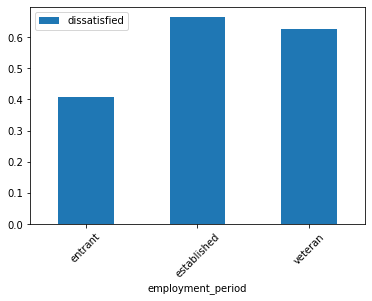

In [683]:
%matplotlib inline
period_percentages=dete_data.pivot_table(index='employment_period',values='dissatisfied')
period_percentages.plot(kind='bar', rot=45)


of the 3 categories of employment period, established employee and veterans tend to quit more due to some kind of dissatisfaction, with new entrants less likely to quit due to the same reason. The deviation isnt much though

### 2. Based on age

In [684]:
dete_data['age'].value_counts()

41-45            35
36-40            29
46-50            29
51-55            25
26-30            23
31-35            20
56-60            19
21-25            16
61 or older      15
20 or younger     1
Name: age, dtype: int64

In [685]:
dete_data['age']=dete_data['age'].str.extract('(\d+)')
dete_data['age'].value_counts()

41    35
46    29
36    29
51    25
26    23
31    20
56    19
21    16
61    15
20     1
Name: age, dtype: int64

In [686]:
ages=[]
for age in dete_data['age'].astype(int):
    if age<25:
        age='young'
    elif age>25 and age<55:
        age='middle_aged'
    elif age>55:
        age='elderly'
    ages.append(age)
dete_data['age']=ages
dete_data['age'].value_counts()

middle_aged    161
elderly         34
young           17
Name: age, dtype: int64

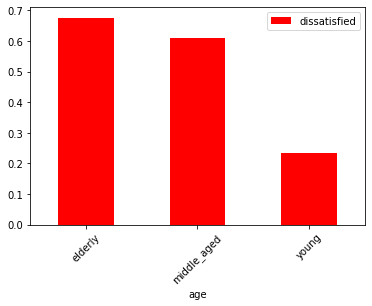

In [687]:
age_percentages=dete_data.pivot_table(index='age',values='dissatisfied')
age_percentages.plot(kind='bar', rot=45, color='red')

Elderly and middle-aged employees are more likely to resign as a result of dissatisfaction